<a href="https://colab.research.google.com/github/dshahid380/CIFAR-10/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [15]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [16]:
from keras.utils import to_categorical

In [148]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


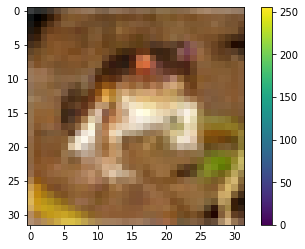

In [149]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

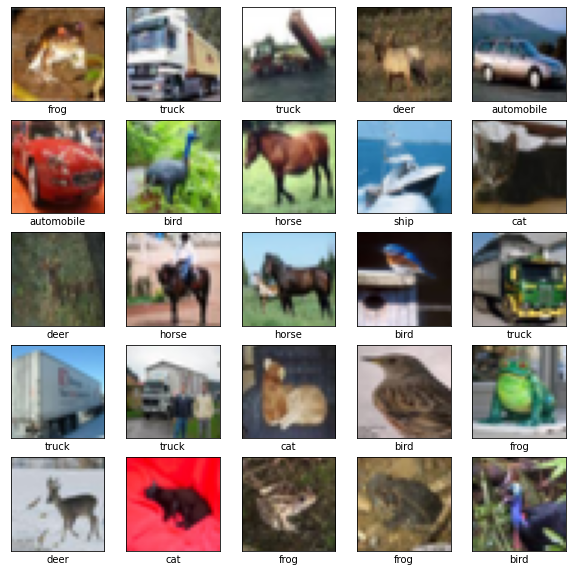

In [151]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

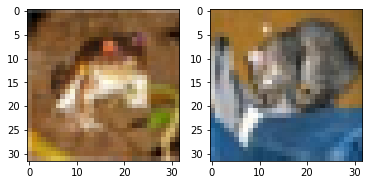

In [153]:
plt.figure(figsize=(6,6))

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')

In [18]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [19]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [83]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape,name="conv_1"))
model1.add(Conv2D(32, (3, 3), activation='relu',name="conv_2"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(64, activation='relu',name="dense_1"))
model1.add(Dropout(0.5))
model1.add(Dense(nClasses, activation='softmax',name="dense_2"))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                460864    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [9]:
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
196/196 [==============================] - 10s 14ms/step - loss: 2.0662 - accuracy: 0.2433 - val_loss: 1.5074 - val_accuracy: 0.4733
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6097 - accuracy: 0.4210 - val_loss: 1.3709 - val_accuracy: 0.5206
Epoch 3/100
196/196 [==============================] - 2s 12ms/step - loss: 1.4450 - accuracy: 0.4871 - val_loss: 1.2391 - val_accuracy: 0.5555
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.3374 - accuracy: 0.5240 - val_loss: 1.1329 - val_accuracy: 0.6073
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2658 - accuracy: 0.5521 - val_loss: 1.0747 - val_accuracy: 0.6199
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2131 - accuracy: 0.5785 - val_loss: 1.1050 - val_accuracy: 0.6093
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 1.1582 - accuracy: 0.5876 - val_loss: 1.0340 - val_accuracy

[1.1949797868728638, 0.704800009727478]

Text(0.5, 1.0, 'Loss Curves')

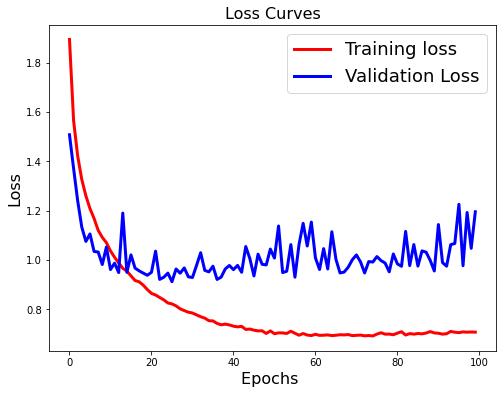

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

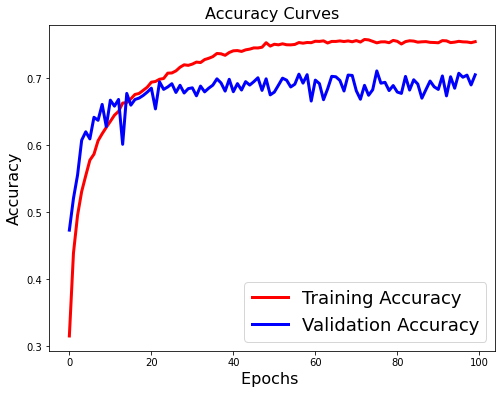

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [12]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nClasses, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [13]:
batch_size = 256
epochs = 100
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
196/196 [==============================] - 5s 21ms/step - loss: 2.1824 - accuracy: 0.1855 - val_loss: 2.0856 - val_accuracy: 0.2770
Epoch 2/100
196/196 [==============================] - 4s 19ms/step - loss: 1.7984 - accuracy: 0.3457 - val_loss: 1.8485 - val_accuracy: 0.3555
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5971 - accuracy: 0.4198 - val_loss: 1.4248 - val_accuracy: 0.4852
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4360 - accuracy: 0.4842 - val_loss: 1.3303 - val_accuracy: 0.5039
Epoch 5/100
196/196 [==============================] - 4s 18ms/step - loss: 1.3262 - accuracy: 0.5258 - val_loss: 1.3636 - val_accuracy: 0.5158
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.2490 - accuracy: 0.5564 - val_loss: 1.0681 - val_accuracy: 0.6185
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.1571 - accuracy: 0.5896 - val_loss: 1.1512 - val_accuracy:

[0.6320281028747559, 0.8004999756813049]

Text(0.5, 1.0, 'Loss Curves')

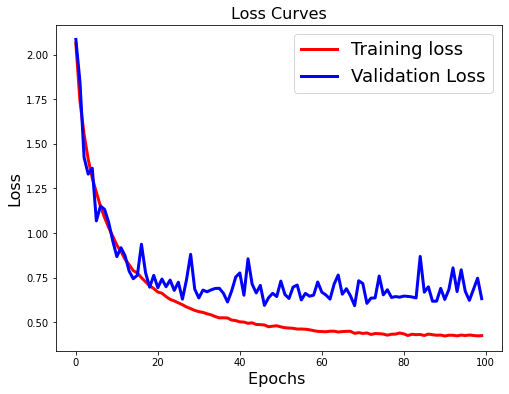

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

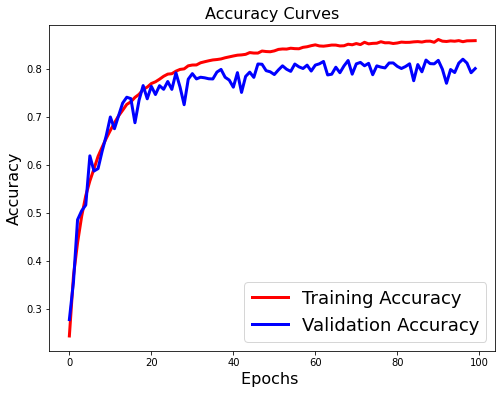

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(nClasses, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)       

In [17]:
batch_size = 256
epochs = 100
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model3.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
196/196 [==============================] - 9s 37ms/step - loss: 2.3758 - accuracy: 0.1097 - val_loss: 2.1253 - val_accuracy: 0.2437
Epoch 2/100
196/196 [==============================] - 7s 36ms/step - loss: 2.0814 - accuracy: 0.2355 - val_loss: 2.0235 - val_accuracy: 0.2420
Epoch 3/100
196/196 [==============================] - 7s 36ms/step - loss: 1.8364 - accuracy: 0.3249 - val_loss: 1.7562 - val_accuracy: 0.3540
Epoch 4/100
196/196 [==============================] - 7s 36ms/step - loss: 1.6464 - accuracy: 0.4026 - val_loss: 1.6033 - val_accuracy: 0.4165
Epoch 5/100
196/196 [==============================] - 7s 36ms/step - loss: 1.5193 - accuracy: 0.4537 - val_loss: 1.3935 - val_accuracy: 0.4922
Epoch 6/100
196/196 [==============================] - 7s 36ms/step - loss: 1.4243 - accuracy: 0.4909 - val_loss: 1.5443 - val_accuracy: 0.4561
Epoch 7/100
196/196 [==============================] - 7s 36ms/step - loss: 1.3402 - accuracy: 0.5267 - val_loss: 1.3254 - val_accuracy:

[3.2054367065429688, 0.77920001745224]

Text(0.5, 1.0, 'Loss Curves')

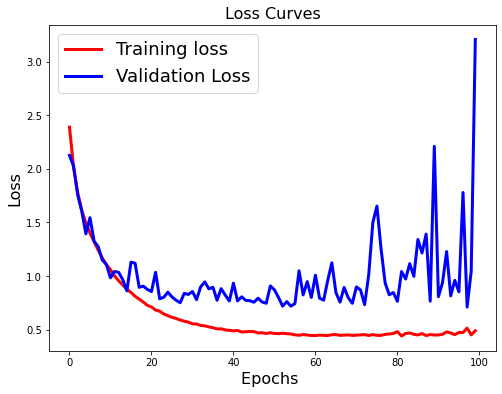

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

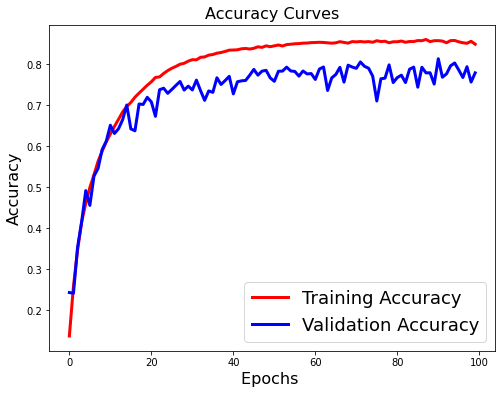

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

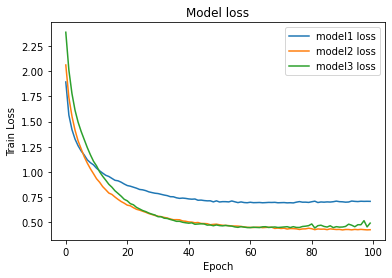

In [20]:
#Plot the training loss of all models
plt.title('Model loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'], label = 'model1 loss' )
plt.plot(history2.history['loss'], label = 'model2 loss' )
plt.plot(history3.history['loss'], label = 'model3 loss' )
plt.legend(loc = 'best')
plt.savefig("CNN_CIFAR10_loss.png")

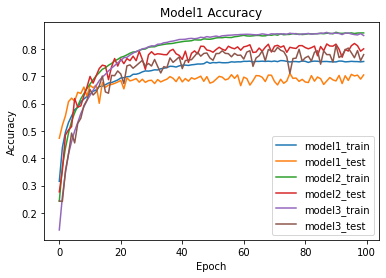

In [21]:
#Plot the accuracy of all models
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'], label = 'model1_train')
plt.plot(history1.history['val_accuracy'], label = 'model1_test')
plt.plot(history2.history['accuracy'], label = 'model2_train')
plt.plot(history2.history['val_accuracy'], label = 'model2_test')
plt.plot(history3.history['accuracy'], label = 'model3_train')
plt.plot(history3.history['val_accuracy'], label = 'model3_test')
plt.legend()
plt.savefig("CNN_CIFAR10_acc.png")